In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [3]:
data=pd.read_csv('hayes-roth.csv')
data.head()

,name,hobby,age,education,marital status,class
0,92,2,1,1,2,1
1,10,2,1,3,2,2
2,83,3,1,4,1,3
3,61,2,4,2,2,3
4,107,1,1,3,4,3


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132 entries, 0 to 131
Data columns (total 6 columns):
name              132 non-null int64
hobby             132 non-null int64
age               132 non-null int64
education         132 non-null int64
marital status    132 non-null int64
class             132 non-null int64
dtypes: int64(6)
memory usage: 6.3 KB


In [5]:
data.describe()

,name,hobby,age,education,marital status,class
count,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000
mean,66.500000,2.000000,1.954545,1.954545,1.954545,1.840909
std,38.249183,0.819607,0.947988,0.947988,0.947988,0.769946
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,33.750000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,66.500000,2.000000,2.000000,2.000000,2.000000,2.000000
75%,99.250000,3.000000,2.000000,2.000000,2.000000,2.000000
max,132.000000,3.000000,4.000000,4.000000,4.000000,3.000000


In [6]:
data.dtypes

name              int64
hobby             int64
age               int64
education         int64
marital status    int64
class             int64
dtype: object

In [7]:
data.isnull().sum()

name              0
hobby             0
age               0
education         0
marital status    0
class             0
dtype: int64

In [8]:
data.skew()

name              0.000000
hobby             0.000000
age               0.746646
education         0.746646
marital status    0.746646
class             0.281827
dtype: float64

In [9]:
data.corr()

,name,hobby,age,education,marital status,class
name,1.000000,0.071102,-0.174736,0.006737,-0.058947,-0.137509
hobby,0.071102,1.000000,0.078598,-0.039299,-0.039299,0.000000
age,-0.174736,0.078598,1.000000,-0.019305,-0.019305,0.418811
education,0.006737,-0.039299,-0.019305,1.000000,-0.019305,0.418811
marital status,-0.058947,-0.039299,-0.019305,-0.019305,1.000000,0.418811
class,-0.137509,0.000000,0.418811,0.418811,0.418811,1.000000


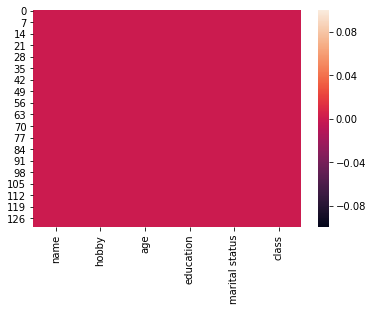

In [10]:
sns.heatmap(data.isnull())

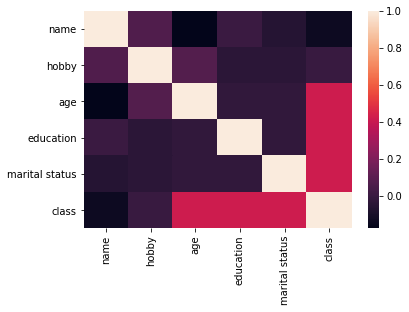

In [11]:
sns.heatmap(data.corr())

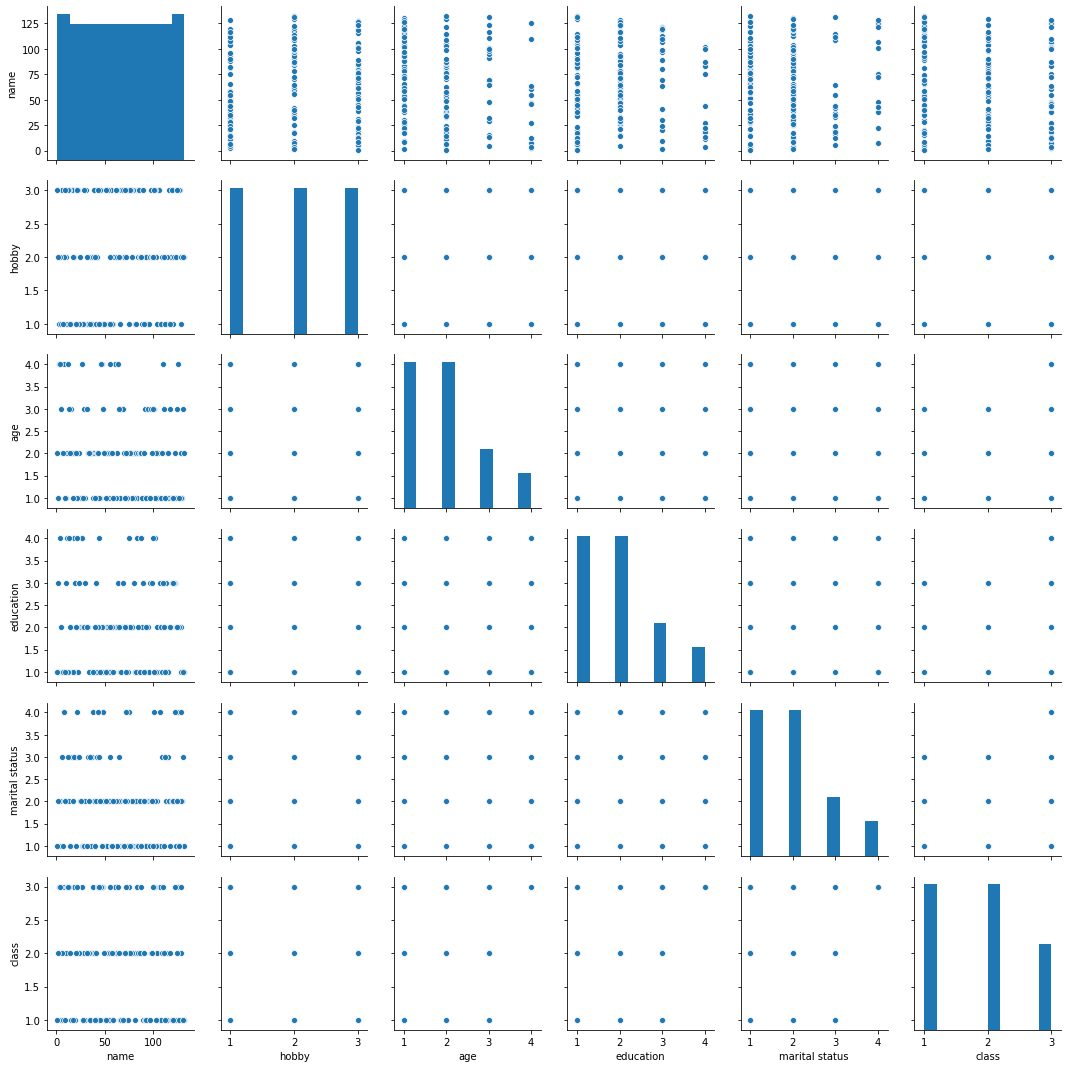

In [12]:
sns.pairplot(data)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F460103828>,
      dtype=object)

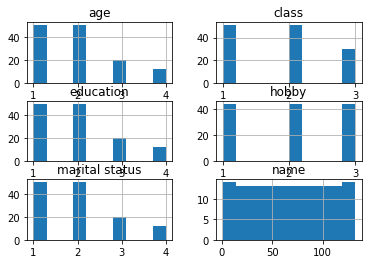

In [13]:
data.hist()

In [14]:
#Testing the data
x=data.drop('class',axis=1)
x.head()

,name,hobby,age,education,marital status
0,92,2,1,1,2
1,10,2,1,3,2
2,83,3,1,4,1
3,61,2,4,2,2
4,107,1,1,3,4


In [15]:
y=data['class'].values
y

array([1, 2, 3, 3, 3, 2, 2, 3, 1, 1, 1, 3, 1, 2, 3, 1, 2, 1, 1, 1, 2, 1,
       1, 1, 1, 2, 2, 2, 1, 1, 3, 1, 2, 1, 3, 2, 2, 2, 2, 3, 2, 2, 2, 1,
       1, 2, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 2, 3, 2, 3, 1, 3, 1,
       2, 2, 3, 2, 3, 2, 2, 1, 3, 3, 1, 3, 1, 1, 3, 2, 1, 1, 3, 2, 2, 2,
       1, 2, 2, 2, 2, 2, 1, 2, 1, 1, 3, 2, 2, 1, 2, 1, 3, 2, 2, 3, 3, 1,
       1, 2, 1, 1, 1, 3, 3, 2, 2, 3, 2, 3, 2, 3, 1, 1, 3, 3, 1, 2, 2, 1],
      dtype=int64)

In [17]:
print(x.shape)
print(y.shape)

(132, 5)
(132,)


In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [52]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.12,random_state=18)

In [53]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(116, 5)
(16, 5)
(116,)
(16,)


In [54]:
lg=LogisticRegression()
lg.fit(x_train,y_train)
predlg=lg.predict(x_test)
print(accuracy_score(y_test,predlg))
print(confusion_matrix(y_test,predlg))
print(classification_report(y_test,predlg))

0.8125
[[5 2 0]
 [1 2 0]
 [0 0 6]]
              precision    recall  f1-score   support

           1       0.83      0.71      0.77         7
           2       0.50      0.67      0.57         3
           3       1.00      1.00      1.00         6

    accuracy                           0.81        16
   macro avg       0.78      0.79      0.78        16
weighted avg       0.83      0.81      0.82        16



In [55]:
rfc=RandomForestClassifier()
print(cross_val_score(estimator=rfc, X=x_train, y=y_train, cv=5))

[0.75       0.875      0.625      0.91304348 0.66666667]


In [56]:
#Applying hyperparameters to tune the model
grid_param={
    'n_estimators': [10,100,500,1000],
    'criterion': ['gini', 'entropy'],
    'bootstrap': [True, False]
}

In [57]:
gscv= GridSearchCV(estimator=rfc,
                     param_grid=grid_param,
                     scoring='accuracy',
                     cv=10,
                     n_jobs=-1)

In [58]:
gscv.fit(x_train,y_train)
best_parameters=gscv.best_params_
print(best_parameters)

{'bootstrap': False, 'criterion': 'entropy', 'n_estimators': 1000}


In [59]:
best_score=gscv.best_score_
print(best_score)

0.8448275862068966


In [60]:
#save the model
from sklearn.externals import joblib
joblib.dump(rfc,"Project24.pkl")

['Project24.pkl']